In [1]:
%load_ext autoreload
%autoreload 2
from python_files import BooleanNets as bn
from python_files import boolean_net_functions as bnf

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output


## Example of loading a predefined net

initializing network from file: model_files/lacNet.json
initial values were chosen such that P(1)=0.5


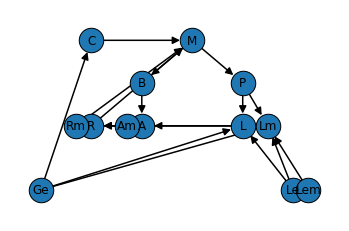

In [2]:
Net=bn.BooleanNetwork(FileName='model_files/lacNet.json')
Net.draw()

## Example of generating a random net


In [3]:
Net = bn.BooleanNetwork(N=10, k=3, SigmaNeighbors=0.3)

I built a random network: using the following parameters: 
Graph:None
NoIsolatedNodes:True
NoSelfLoops:True
p1:0.5
notConstant_notCopy:True
rootNodesConstant:True
initial values were chosen such that P(1)=0.5


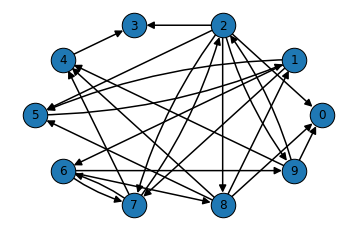

In [4]:
Net.draw()

## Example of building a net from scratch

### Option A

Built network from specifications
initial values were chosen such that P(1)=0.5


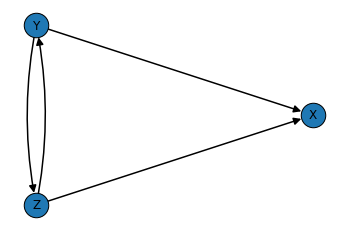

In [5]:
Net= bn.BooleanNetwork(NodeIDs=['X', 'Y', 'Z'], NodeInputs={'X':['Y', 'Z'], 'Y':['Z'], 'Z':['Y']}, 
                       NodeFunctions={'X': lambda y,z:int(y and z), 
                                      'Y':lambda z: int(not(z)), 
                                      'Z':lambda y:int(y)})
Net.draw()

### Option B

Built network from specifications
initial values were chosen such that P(1)=0.5


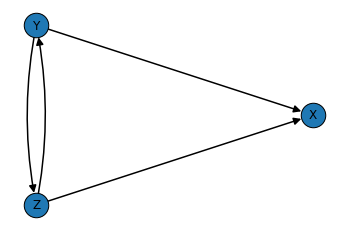

In [6]:
Net= bn.BooleanNetwork(NodeIDs=['X', 'Y', 'Z'], NodeInputs={'X':['Y', 'Z'], 'Y':['Z'], 'Z':['Y']}, 
                       NodeFunctions={'X':{(0,0):1, (0,1):1, (1,0):1, (1,1):1}, 
                                      'Y':{(0,):0, (1,):1},
                                      'Z':{(0,):1, (1,):0}})
Net.draw()

## Updating

In [7]:
#### get Current Values
Net.assign_values_to_nodes(value_list=[0,0,1])
print('before update', Net.CurrentValues)
Net.update_all()
print('after update', Net.CurrentValues)

before update {'X': 0, 'Y': 0, 'Z': 1}
after update {'X': 1, 'Y': 1, 'Z': 1}


In [8]:
#### find attractor of current state
Net.assign_values_to_nodes(value_list=[0,0,0])
Net.update_until_cycle()

found circle of length 4:
[(1, 0, 1), (1, 1, 1), (1, 1, 0), (1, 0, 0), (1, 0, 1)]


((0, 0, 0), 4, [(1, 0, 1), (1, 1, 1), (1, 1, 0), (1, 0, 0), (1, 0, 1)])

In [9]:
# sucessors of all states
start, stop = Net.calc_all_updates()
print('start \t     stop')
print('------------------')
for s in range(len(start)):
    print(start[s], ' | ', stop[s])

start 	     stop
------------------
[0 0 0]  |  [1 0 1]
[0 0 1]  |  [1 1 1]
[0 1 0]  |  [1 0 0]
[0 1 1]  |  [1 1 0]
[1 0 0]  |  [1 0 1]
[1 0 1]  |  [1 1 1]
[1 1 0]  |  [1 0 0]
[1 1 1]  |  [1 1 0]


In [10]:
#scan for fixed points
res_dict = Net.scan_state_space()
for key in res_dict:
    print("{} cycles of length {}".format(len(res_dict[key]), key))

1 cycles of length 4
0 cycles of length 0


### Mutual Information 

# Overview of the boolean_network_functions module

Built network from specifications
initial values were chosen such that P(1)=0.5
start 	     stop
------------------
[0 0 0 0]  |  [1 0 0 1]
[0 0 0 1]  |  [1 1 0 1]
[0 0 1 0]  |  [1 0 0 0]
[0 0 1 1]  |  [1 1 0 0]
[0 1 0 0]  |  [1 0 0 1]
[0 1 0 1]  |  [0 1 1 1]
[0 1 1 0]  |  [1 0 0 0]
[0 1 1 1]  |  [0 1 1 0]
[1 0 0 0]  |  [1 1 0 1]
[1 0 0 1]  |  [1 0 0 1]
[1 0 1 0]  |  [1 1 0 0]
[1 0 1 1]  |  [1 0 0 0]
[1 1 0 0]  |  [1 1 0 1]
[1 1 0 1]  |  [0 0 1 1]
[1 1 1 0]  |  [1 1 0 0]
[1 1 1 1]  |  [0 0 1 0]


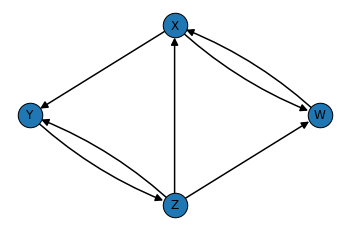

In [11]:
Net= bn.BooleanNetwork(NodeIDs=['W','X', 'Y', 'Z'], NodeInputs={'W':['X','Z'], 'X':['W', 'Z'], 'Y':['X','Z'], 'Z':['Y']}, 
                       NodeFunctions={'W':{(0,0):1, (0,1):1, (1,0):1, (1,1):0},
                                      'X':{(0,0):0, (0,1):1, (1,0):1, (1,1):0}, 
                                      'Y':{(0,0):0, (0,1):0, (1,0):0, (1,1):1},
                                      'Z':{(0,):1, (1,):0}})
Net.draw()

# sucessors of all states
start, stop = Net.calc_all_updates()
print('start \t     stop')
print('------------------')
for s in range(len(start)):
    print(start[s], ' | ', stop[s])

## Functions for finding attractors and their basins of attraction

In [12]:
#scan for fixed points
res_dict = Net.scan_state_space()
for key in res_dict:
    print("{} cycles of length {}".format(len(res_dict[key]), key))
    
basins = bnf.find_basins_of_attraction(Net)
for key in basins: 
    print("the attractor {} has a basin of size {}".format(key, len(basins[key])))

1 cycles of length 3
1 cycles of length 0
[(1, 1, 0, 1), (0, 0, 1, 1), (1, 1, 0, 0), (1, 1, 0, 1)]
the attractor (3, (1, 1, 0, 1)) has a basin of size 13
the attractor (0, (1, 0, 0, 1)) has a basin of size 3


In [13]:
#### Generate graphs of attractors and state space for visualization or further analysis

0.9375
waiting for plot


C:\Users\claud\anaconda3\lib\site-packages\networkx\drawing\layout.py:950: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


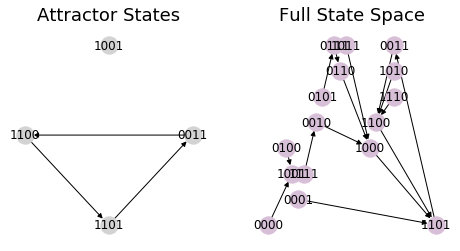

In [14]:
plt.figure(figsize=(8,4))
plt.subplot(121)
G_attractor = bnf.make_attractor_graph(Net)
plt.title("Attractor States", size=18)

plt.subplot(122)
G_statespace = bnf.make_state_diagram(Net)
plt.title("Full State Space", size=18)

plt.show()

### Network Sensitivity

In [15]:
sens_dict = bnf.NetworkSensitivity(Net)
print('Node \t Sensitivity')

for key, value in sens_dict.items(): 
    print(key, '\t', value)
    
print('avg. \t', np.mean(list(sens_dict.values())))

Node 	 Sensitivity
W 	 1.0
X 	 2.0
Y 	 1.0
Z 	 1.0
avg. 	 1.25


### Fraction of Canalyzing Functions

In [16]:
cana_dict = bnf.NetworkCanalyzing(Net)
print('Node \t Sensitivity')

for key, value in cana_dict.items(): 
    print(key, '\t', (value>-1))
    
print('\n{}% of all functions are canalyzing'.format(100*np.mean((np.array(list(cana_dict.values()))>-1).astype(int))))

Node 	 Sensitivity
W 	 True
X 	 False
Y 	 True
Z 	 True

75.0% of all functions are canalyzing


### Find Clusters with low entropy
The concept of a cluster here is one of nodes that 'act together' independent of whether they are directly conneted. By acting together we mean that for all attractor states (i.e biologically observable states) these nodes take on only a small subset of all possible values. This means that if the network has e.g 7 attractor states but in all of these the nodes X,Y and Z are either all 'on' or all 'off', we call XYZ a cluster. The function find_clusters() identifies such clusters by first calculating the atrractor states of the network and then identifying groups of nodes whose joint entropy is considerably lower than if they acted indenpendently. 
In the current network the nodes W and Y are identified as a cluster which is reasonable beacause they both receive the same inputs

In [17]:
# the output is a list of tuples, where the first entry is a tuple of node indices 
# and the second entry is the jount entropy
bnf.find_clusters(Net)

 Checking tuples of length: 3   

[((0, 2), 0.8112781244591328)]

### Pairwise Mutual Information

Text(0.5, 1.0, '5 Updating Steps')

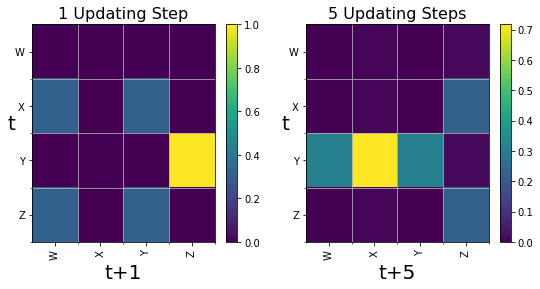

In [18]:
plt.figure(figsize=(9,4))
plt.subplot(121)
mi = bnf.calc_mutual_information_all_pairs(Net, plot=True)
plt.title('1 Updating Step', size=16)

plt.subplot(122)
mi = bnf.calc_mutual_information_all_pairs(Net, rounds=5, plot=True)
plt.title('5 Updating Steps', size=16)


### Information Flow between triples
Use infromation decomposition to analyze the information flow among node triplets

In [19]:
syn, red, unique, mi, mi_pair = bnf.info_flow_in_tuples_and_triplets(Net, 2)
print('The average synergistic information among 2 inputs about about an output is {} bits'.format(np.round(np.mean(syn), 2)))
print('The average redundand information among 2 inputs about about an output is {} bits'.format(np.round(np.mean(red), 2)))
print('The average unique infromation from 1 input about about an output is {} bits'.format(np.round(np.mean(unique), 2)))
print('The average mutual information from one of two inputs to an output is {} bits'.format(np.round(np.mean(mi), 2)))
print('The average mutual information from two inputs to an output is {} bits'.format(np.round(np.mean(mi_pair), 2)))

Calculating info flow for 3 triplets....
The average synergistic information among 2 inputs about about an output is 0.67 bits
The average redundand information among 2 inputs about about an output is 0.21 bits
The average unique infromation from 1 input about about an output is -0.0 bits
The average mutual information from one of two inputs to an output is 0.21 bits
The average mutual information from two inputs to an output is 0.87 bits


### Information Flow between triples
Use mutual infromation to calculate the infromation flow between parent and child nodes

In [20]:
mi = bnf.info_flow_in_tuples_and_triplets(Net, 1)
print('The average mutual information between an input and an output is {} bits'.format(np.round(np.mean(mi), 2)))


Calculating info flow for 7 pairs....
The average mutual information between an input and an output is 0.32 bits


### Information Flow between groups of nodes: 

In [21]:
bnf.info_decomposition_clusters(Net, ['W', 'Y'], ['X'], ['Z'])

{'UNI0': 0.9999999638810073,
 'UNI1': 2.220446049250313e-16,
 'SYN': 0,
 'RED': 0,
 'MI0': 1.0,
 'MI1': 0.0,
 'MI': 1.0}

#### This can be used to calculate the infromation flow of a set of randomly generated networks, to study the effect of network properties on information flow:

0.5:9   
I built a random network: using the following parameters: 
Graph:None
NoIsolatedNodes:True
NoSelfLoops:True
p1:0.5
notConstant_notCopy:True
rootNodesConstant:True
initial values were chosen such that P(1)=0.5
Calculating info flow for 15 pairs....


Text(0, 0.5, 'Mutual Information')

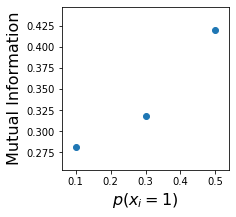

In [23]:
res = {}
N =10
k=2
iters = 10
for p in [0.1,0.3,0.5]:
    mi_vales=[]
    for i in range(iters):
        clear_output(wait=True)
        print("{}:{}   ".format(p, i))
        net = bn.BooleanNetwork(N=N, k=k, SigmaNeighbors=0.01,RandomNetworkParams={"p1":p})
        mi_vales.append(np.mean(bnf.info_flow_in_tuples_and_triplets(net, 1)))
        
    res[p] = mi_vales

plt.figure(figsize=(3,3))
plt.scatter(list(res.keys()), [np.mean(val) for val in res.values()])
plt.xlabel('$p(x_i = 1)$', size=16)
plt.ylabel('Mutual Information', size=16)